In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import os
os.getcwd()

'C:\\Users\\shijo\\Desktop\\YorkUBigData\\MyTries\\MyLearning\\Logistic_Regression'

In [8]:
df = pd.read_csv('marks.txt', sep=",", header=None)

In [13]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [23]:
df.rename(columns={0: "Mark1", 1:"Mark2", 2 : "Admitted"}, inplace = True)

In [72]:
df.head()

,Mark1,Mark2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [26]:
df.shape

(100, 3)

In [27]:
df.describe()

,Mark1,Mark2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [31]:
df.isnull().sum()

Mark1       0
Mark2       0
Admitted    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Mark1       100 non-null float64
Mark2       100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


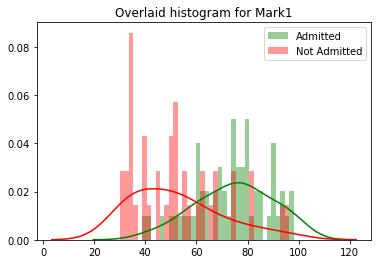

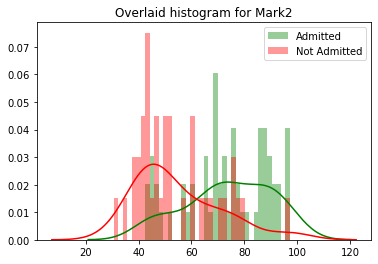

In [79]:
for i in ['Mark1','Mark2']:
    admitted = list(df[df['Admitted'] == 1][i])
    not_admitted = list(df[df['Admitted'] == 0][i])
    xmin = min(min(admitted),min(not_admitted))
    xmax = max(max(admitted),max(not_admitted))
    width = (xmax - xmin)/40
    sns.distplot(admitted, color = 'g', kde = True, bins = np.arange(xmin, xmax, width))
    sns.distplot(not_admitted, color = 'r', kde = True, bins = np.arange(xmin, xmax, width))
    plt.legend(['Admitted', 'Not Admitted'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()  

<Figure size 432x288 with 0 Axes>

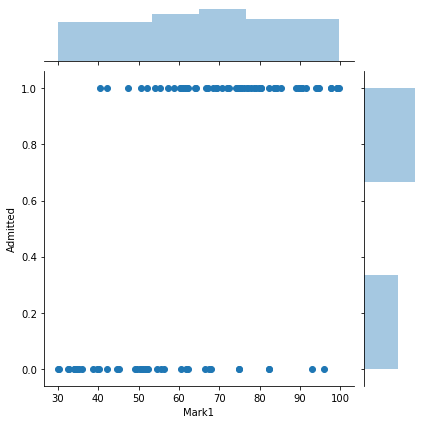

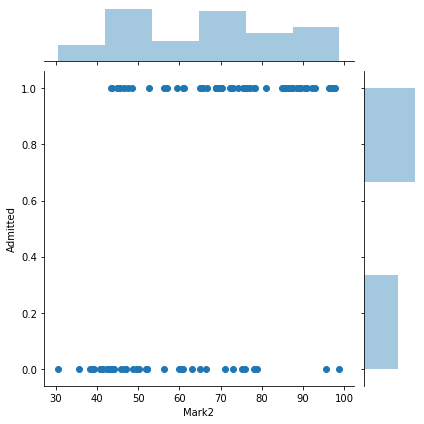

In [92]:
for i, col in enumerate(['Mark1', 'Mark2']):
    plt.figure(i)
    sns.jointplot(x=col, y="Admitted", data=df);

<Figure size 432x288 with 0 Axes>

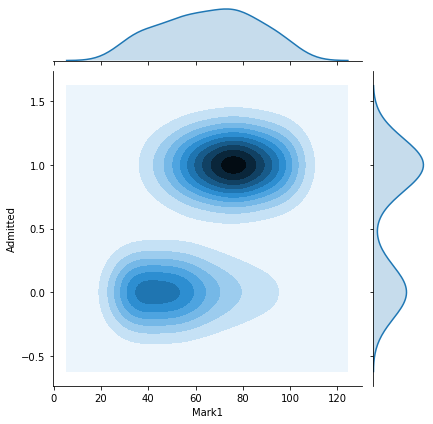

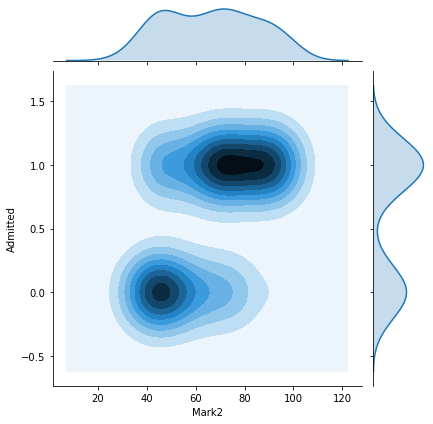

In [93]:
for i, col in enumerate(['Mark1', 'Mark2']):
    plt.figure(i)
    sns.jointplot(x=col, y="Admitted", data=df, kind="kde");

In [94]:
df.groupby('Admitted').mean()

,Mark1,Mark2
Admitted,,
0,52.032301,54.620392
1,74.718923,73.956402


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
features = df.drop('Admitted',axis =1)
labels = df['Admitted']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,random_state = 42)

In [99]:
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(labels),2))

0.8
0.2


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [101]:
tr_features = X_train
tr_labels = y_train

In [102]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, tr_features, tr_labels, cv = 5)

In [103]:
scores

array([0.88235294, 0.82352941, 1.        , 0.93333333, 0.93333333])

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
def print_results(results):
    print('BEST PARAMS: []'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std*2,3),params))

In [106]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators':[5, 50, 100],
    'max_depth':[2,10,20,None]
}

cv = GridSearchCV(rf, parameters, cv = 5)

In [107]:
cv.fit(tr_features, tr_labels)
print_results(cv)

BEST PARAMS: []
0.862 (+/-0.188) for {'max_depth': 2, 'n_estimators': 5}
0.9 (+/-0.16) for {'max_depth': 2, 'n_estimators': 50}
0.912 (+/-0.098) for {'max_depth': 2, 'n_estimators': 100}
0.888 (+/-0.189) for {'max_depth': 10, 'n_estimators': 5}
0.925 (+/-0.088) for {'max_depth': 10, 'n_estimators': 50}
0.912 (+/-0.052) for {'max_depth': 10, 'n_estimators': 100}
0.875 (+/-0.271) for {'max_depth': 20, 'n_estimators': 5}
0.912 (+/-0.052) for {'max_depth': 20, 'n_estimators': 50}
0.925 (+/-0.088) for {'max_depth': 20, 'n_estimators': 100}
0.875 (+/-0.21) for {'max_depth': None, 'n_estimators': 5}
0.888 (+/-0.086) for {'max_depth': None, 'n_estimators': 50}
0.912 (+/-0.052) for {'max_depth': None, 'n_estimators': 100}


C:\Users\shijo\Anaconda3\envs\fastai\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [108]:
te_features = X_test
te_labels = y_test

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [110]:
rf2 = RandomForestClassifier(n_estimators=50, max_depth =10)
rf2.fit(tr_features, tr_labels)

rf3 = RandomForestClassifier(n_estimators=100, max_depth =20)
rf3.fit(tr_features, tr_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
for mdl in [rf2, rf3]:
    y_pred = mdl.predict(te_features)
    accuracy = round(accuracy_score(te_labels, y_pred), 3)
    precision = round(precision_score(te_labels, y_pred), 3)
    recall = round(recall_score(te_labels, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                        mdl.n_estimators,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

MAX DEPTH: 10 / # OF EST: 50 -- A: 0.85 / P: 1.0 / R: 0.75
MAX DEPTH: 20 / # OF EST: 100 -- A: 0.85 / P: 1.0 / R: 0.75
